# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the SOUTHERN hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth. (For example: It is considered "summer" this time of year in places like Australia).
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import config
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=25d95a902b40b8567c1cf7c2534a5333&units=imperial&q='

In [4]:
# list for response results
temp = []
counter = 1
set = 1

# loop through cities, make API request, and append desired results
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp'])
        print(f'Processing Record {counter} of Set {set} | {city}')
        counter +=1
        
        if counter >50:
            set +=1
            counter = 1
        
    except KeyError:
        print(f'City not found. Skipping...')
        pass

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | pacific grove
Processing Record 3 of Set 1 | muslyumovo
City not found. Skipping...
Processing Record 4 of Set 1 | nizhneangarsk
Processing Record 5 of Set 1 | soto la marina
Processing Record 6 of Set 1 | kushiro
City not found. Skipping...
City not found. Skipping...
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | narsaq
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | hailar
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | jacareacanga
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | lubao
Processing Record 19 of Set 1 | loandjili
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | avarua
City not found. Skipping...
Processing Record 22 of 

Processing Record 36 of Set 4 | kaitangata
Processing Record 37 of Set 4 | pechora
Processing Record 38 of Set 4 | vanavara
Processing Record 39 of Set 4 | bredasdorp
Processing Record 40 of Set 4 | raudeberg
Processing Record 41 of Set 4 | saint-joseph
Processing Record 42 of Set 4 | biak
Processing Record 43 of Set 4 | wenling
Processing Record 44 of Set 4 | hambantota
Processing Record 45 of Set 4 | la ronge
Processing Record 46 of Set 4 | upington
Processing Record 47 of Set 4 | severo-kurilsk
Processing Record 48 of Set 4 | gorontalo
City not found. Skipping...
Processing Record 49 of Set 4 | itaituba
City not found. Skipping...
Processing Record 50 of Set 4 | mogadishu
Processing Record 1 of Set 5 | aripuana
Processing Record 2 of Set 5 | santa marta
Processing Record 3 of Set 5 | buritama
Processing Record 4 of Set 5 | osypenko
Processing Record 5 of Set 5 | pontes e lacerda
Processing Record 6 of Set 5 | klaksvik
City not found. Skipping...
Processing Record 7 of Set 5 | coulom

Processing Record 17 of Set 8 | ulladulla
Processing Record 18 of Set 8 | kargasok
Processing Record 19 of Set 8 | bytosh
Processing Record 20 of Set 8 | vila velha
City not found. Skipping...
Processing Record 21 of Set 8 | portland
City not found. Skipping...
Processing Record 22 of Set 8 | comodoro rivadavia
Processing Record 23 of Set 8 | jiexiu
Processing Record 24 of Set 8 | bubaque
Processing Record 25 of Set 8 | sharjah
Processing Record 26 of Set 8 | ujhani
Processing Record 27 of Set 8 | waitati
Processing Record 28 of Set 8 | pierre
Processing Record 29 of Set 8 | severomuysk
Processing Record 30 of Set 8 | caibarien
Processing Record 31 of Set 8 | tacuarembo
City not found. Skipping...
Processing Record 32 of Set 8 | gumdag
Processing Record 33 of Set 8 | hamilton
Processing Record 34 of Set 8 | hasaki
Processing Record 35 of Set 8 | lerwick
Processing Record 36 of Set 8 | bambous virieux
Processing Record 37 of Set 8 | saint-augustin
Processing Record 38 of Set 8 | kirovsk

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create dictionary with all variables, called from the API
name = []
temp = []
humid = []
cloud = []
wind = []
lat = []
long = []
country = []
date = []
temp_max = []

# loop through cities, make API request, and append desired results to list names
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        name.append(response['name'])
        humid.append(response['main']['humidity'])
        temp.append(response['main']['temp'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        temp_max.append(response['main']['temp_max'])
        
    #Passes any time a city name is not available     
    except KeyError:
        pass

In [5]:
# Create dictionary using lists and column names to reference
city_data_dict = {
    'City Name': name,
    'Temperature': temp,
    'Humidity': humid,
    'Cloudiness': cloud,
    'Wind Speed': wind,
    'Country': country,
    'Latitude': lat,
    'Longitude': long,
    'Date': date  
}

# Create dataframe from dictionary
city_data_df = pd.DataFrame(city_data_dict)
city_data_df.head()

,City Name,Temperature,Humidity,Cloudiness,Wind Speed,Country,Latitude,Longitude,Date
0,Bowmore,75.78,29,1,12.75,US,34.94,-79.30,1554921932
1,Kieta,77.62,100,92,4.05,PG,-6.22,155.63,1554921971
2,Saint-Philippe,37.27,64,1,6.93,CA,45.36,-73.48,1554921957
3,Mar del Plata,60.34,50,0,3.94,AR,-46.43,-67.52,1554921971
4,Makasar,80.29,78,20,8.05,ID,-6.28,106.88,1554921748


In [6]:
# Display number of rows
city_data_df.count()

City Name      561
Temperature    561
Humidity       561
Cloudiness     561
Wind Speed     561
Country        561
Latitude       561
Longitude      561
Date           561
dtype: int64

In [26]:
# Save dataframe to CSV file
city_data_df.to_csv("city_data.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

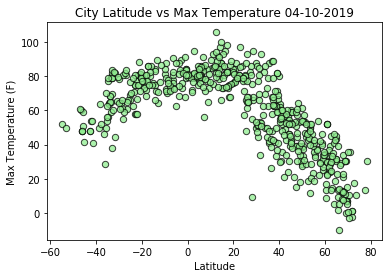

In [27]:
# Create Scatter Plot
plt.scatter(lat, temp_max, marker="o", facecolors="lightgreen", edgecolors="black",
            s=40, alpha=0.75)

# Get today's date
import datetime
d = datetime.datetime.today()
 
# Converting date into DD-MM-YYYY format
d_conv = d.strftime('%m-%d-%Y')

# Set a Title and labels
plt.title(f"City Latitude vs Max Temperature {d_conv}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save and Show
plt.savefig("../Images/lat_vs_max_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

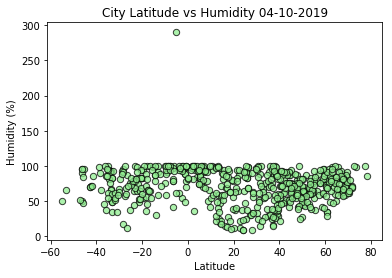

In [37]:
# Create Scatter Plot
plt.scatter(lat, humid, marker="o", facecolors="lightgreen", edgecolors="black",
            s=40, alpha=0.75)

# Set a Title and labels
plt.title(f"City Latitude vs Humidity {d_conv}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save and Show
plt.savefig("../Images/lat_vs_humidity.png")
plt.show()

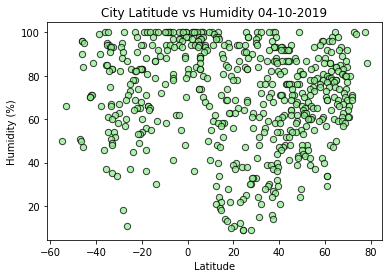

In [38]:
# The previous humidity chart had one outlier, so drop outlier point and re-plot
city_data_df = city_data_df.sort_values(by=['Humidity'], ascending= False)
city_data_df = city_data_df.iloc[1:]
humid2 = city_data_df['Humidity'].tolist()
lat2 = city_data_df['Latitude'].tolist()

# Create Scatter Plot
plt.scatter(lat2, humid2, marker="o", facecolors="lightgreen", edgecolors="black",
            s=40, alpha=0.75)

# Set a Title and labels
plt.title(f"City Latitude vs Humidity {d_conv}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save and Show
plt.savefig("../Images/lat_vs_humidity_fixed.png")
plt.show()

#### Latitude vs. Cloudiness Plot

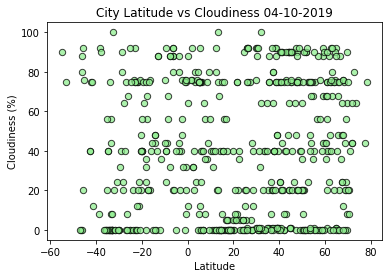

In [39]:
# Create Scatter Plot
plt.scatter(lat, cloud, marker="o", facecolors="lightgreen", edgecolors="black",
            s=40, alpha=0.75)

# Set a Title and labels
plt.title(f"City Latitude vs Cloudiness {d_conv}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# # Save and Show
plt.savefig("../Images/lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

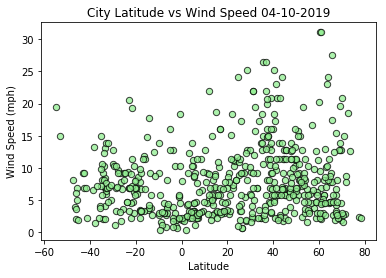

In [40]:
# Create Scatter Plot
plt.scatter(lat, wind, marker="o", facecolors="lightgreen", edgecolors="black",
            s=40, alpha=0.75)

# Set a Title and labels
plt.title(f"City Latitude vs Wind Speed {d_conv}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save and Show
plt.savefig("../Images/lat_vs_wind_speed.png")
plt.show()